## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lasso import LassoRegression

In [2]:
def mae(y_true , y_predicted):
    sum_error = np.sum(np.abs(y_predicted - y_true)) 
    return sum_error/y_true.shape[0]

In [3]:
X, y = load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [5]:
scaler = StandardScaler().fit(X_train) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Without Regularization

In [6]:
lasso = LassoRegression(learning_rate=0.01, alpha = 0)
losses = lasso.fit(X_train, y_train)
hyperplane_params = lasso.best_params

In [7]:
y_predicted_train = lasso.predict(X_train)
y_predicted_test = lasso.predict(X_test)

In [8]:
print('Linear regression model mae on training set is  :', '{}'.format(mae(y_train, y_predicted_train)))
print('Linear regression model mae on validation set is:', '{}'.format(mae(y_test, y_predicted_test)))

Linear regression model mae on training set is  : 42.59307039102034
Linear regression model mae on validation set is: 45.83090121800083


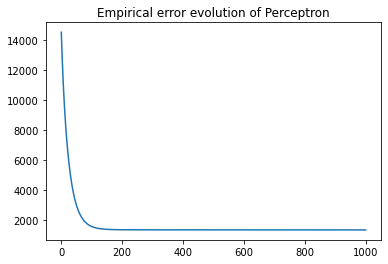

In [9]:
plt.title('Empirical error evolution of Perceptron')
plt.plot(losses)

## With L1 Regularization (Lasso)

In [10]:
lasso = LassoRegression(learning_rate=0.01, alpha = 1.5)
losses = lasso.fit(X_train, y_train)
hyperplane_params = lasso.best_params

In [11]:
y_predicted_train = lasso.predict(X_train)
y_predicted_test = lasso.predict(X_test)

In [12]:
print('Lasso regression model mae on training set is:', '{}'.format(mae(y_train, y_predicted_train)))
print('Lasso regression model mae on validation set is:', '{}'.format(mae(y_test, y_predicted_test)))

Lasso regression model mae on training set is: 42.59389753804027
Lasso regression model mae on validation set is: 45.82911725644999


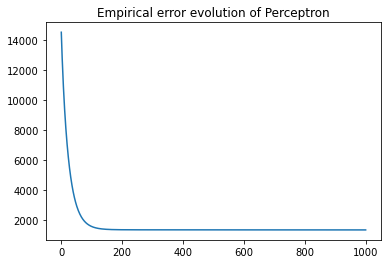

In [13]:
plt.title('Empirical error evolution of Perceptron')
plt.plot(losses)

## Influence of regularization on coefficients

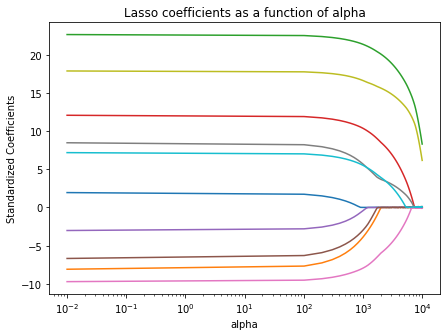

In [14]:
alphas = np.linspace(0.01,10000,100)
lasso = LassoRegression()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.best_params.get('w'))

fig = plt.figure(figsize=(7,5))
ax = plt.gca()

ax.plot(alphas, coefs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

## Cross Validation (Grid Search)

In [15]:
from sklearn.model_selection import GridSearchCV

In [23]:
alphas = {'alpha': np.arange(0, 200, 1)}
best_model = GridSearchCV(LassoRegression(), param_grid=alphas, scoring = 'neg_mean_absolute_error', cv = 5).fit(X_train, y_train).best_estimator_

In [24]:
best_alpha = best_model.alpha

In [25]:
best_alpha

102

In [26]:
lasso = LassoRegression(learning_rate=0.01, alpha = best_alpha)
losses = lasso.fit(X_train, y_train)
hyperplane_params = lasso.best_params

In [27]:
y_predicted_train = lasso.predict(X_train)
y_predicted_test = lasso.predict(X_test)

In [28]:
print('Lasso regression model mae on training set is:', '{}'.format(mae(y_train, y_predicted_train)))
print('Lasso regression model mae on validation set is:', '{}'.format(mae(y_test, y_predicted_test)))

Lasso regression model mae on training set is: 42.651762649813286
Lasso regression model mae on validation set is: 45.71297735215006


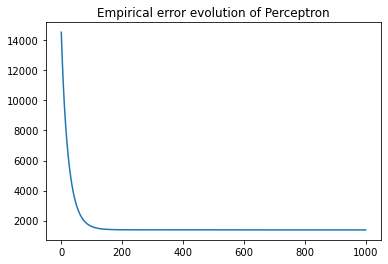

In [29]:
plt.title('Empirical error evolution of Perceptron')
plt.plot(losses)